## Modelling: Accident Number & StreetView Indices using XGBoost and SHAP

### Part Ⅰ Data integration

In [1]:
import geopandas as gpd
import pandas as pd

In [3]:
# accident table
accident_location = pd.read_csv(r'./2022_accident_deduplicated.csv')[[
    '_Collision Id',  'Easting', 'Northing'
]].drop_duplicates(['_Collision Id']).set_index(['_Collision Id'])

# SEG Result
seg_res = pd.read_csv(r'./result_2022.csv')[[
    'GSV_ID', 'SBI', 'SLI', 'SVI', 'TFI', 'PSI', 'SI', 'GVI', 'SAI'
]].set_index(['GSV_ID'])

# GSV_ Processing
GSV_recorder = pd.read_csv(r'./GSV_recorder.csv')[[
    '_Collision Id', 'GSV_ID'
]].drop_duplicates().set_index("_Collision Id")
GSV_recorder = GSV_recorder[GSV_recorder['GSV_ID'] != '0']


In [4]:
# merge table
final_result = pd.merge(accident_location,
         pd.merge(GSV_recorder, seg_res, left_on='GSV_ID', right_index=True),left_index=True,right_index=True)
final_result['geometry'] = gpd.points_from_xy(final_result['Easting'],
                                              final_result['Northing'])
final_result_gdf = gpd.GeoDataFrame(final_result, crs="epsg:27700")
final_result_gdf

Easting  Northing  \
_Collision Id                      
1220352073      525199    177928   
1220352573      546214    179866   
1220352575      551119    174789   
1220352578      528889    192230   
1220352580      539773    190404   
...                ...       ...   
48221290750     533225    181152   
48221290761     533330    180697   
48221291921     532690    181815   
48221292373     532976    180959   
48221292435     533626    181111   

                                                          GSV_ID   SBI  SLI  \
_Collision Id                                                                 
1220352073                                8pcguVQpxRMikWptAhcM8w  0.03  0.0   
1220352573                                W6Sb88R-9T6-XsePOV2djw  0.03  0.0   
1220352575                                y8kAs_vlA9uO4OhujCT3bQ  0.10  0.0   
1220352578                                m6WRQ-jBOtDvWhZbRPF6UA  0.01  0.0   
1220352580                                t9MI-qXC2t72e_Pv1E46rA  0.05  0.0   
...                                                          ...   ...  ...   
48221290750    CAoSLEFGMVFpcE9VWlppYXVIamFIeWtXTEh6d1QwVE9Pc0...  0.02  0.0   
48221290761                               GQrRkoMBvRRyrsOuEcA0-Q  0.01  0.0   
48221291921                               TC-DhItdWOk3PwYmTScaag  0.02  0.0   
48221292373    CAoSLEFGMVFpcE01RWM2Um1iZnBIcE5fXzFRUHZwS2c1SX...  0.00  0.0   
48221292435                               vA87ZpcsL0NpVVn5_PZdLw  0.01  0.0   

                SVI   TFI   PSI    SI   GVI  SAI  \
_Collision Id                                      
1220352073     0.00  0.05  0.13  0.08  0.15  0.0   
1220352573     0.00  0.01  0.02  0.20  0.52  0.0   
1220352575     0.00  0.04  0.04  0.17  0.03  0.0   
1220352578     0.00  0.07  0.01  0.10  0.07  0.0   
1220352580     0.00  0.03  0.00  0.23  0.30  0.0   
...             ...   ...   ...   ...   ...  ...   
48221290750    0.00  0.03  0.17  0.01  0.00  0.0   
48221290761    0.00  0.05  0.26  0.07  0.02  0.0   
48221291921    0.01  0.03  0.12  0.01  0.00  0.0   
48221292373    0.00  0.02  0.08  0.03  0.00  0.0   
48221292435    0.00  0.03  0.16  0.02  0.01  0.0   

                                    geometry  
_Collision Id                                 
1220352073     POINT (525199.000 177928.000)  
1220352573     POINT (546214.000 179866.000)  
1220352575     POINT (551119.000 174789.000)  
1220352578     POINT (528889.000 192230.000)  
1220352580     POINT (539773.000 190404.000)  
...                                      ...  
48221290750    POINT (533225.000 181152.000)  
48221290761    POINT (533330.000 180697.000)  
48221291921    POINT (532690.000 181815.000)  
48221292373    POINT (532976.000 180959.000)  
48221292435    POINT (533626.000 181111.000)  

[8530 rows x 12 columns]

In [5]:
MSOA = gpd.read_file(r'./MSOA.geojson')
MSOA = MSOA[['MSOA11CD', 'MSOA11NM', 'geometry']]
MSOA

MSOA11CD                  MSOA11NM  \
0    E02000001        City of London 001   
1    E02000002  Barking and Dagenham 001   
2    E02000003  Barking and Dagenham 002   
3    E02000004  Barking and Dagenham 003   
4    E02000005  Barking and Dagenham 004   
..         ...                       ...   
978  E02006927             Greenwich 034   
979  E02006928             Greenwich 035   
980  E02006929             Greenwich 036   
981  E02006930             Greenwich 037   
982  E02006931             Greenwich 038   

                                              geometry  
0    MULTIPOLYGON (((531667.624 180534.992, 531647....  
1    MULTIPOLYGON (((548881.563 190845.265, 548881....  
2    MULTIPOLYGON (((549102.438 189324.625, 548954....  
3    MULTIPOLYGON (((551549.998 187364.637, 551478....  
4    MULTIPOLYGON (((549099.634 187656.076, 549161....  
..                                                 ...  
978  MULTIPOLYGON (((541029.881 176265.023, 541101....  
979  MULTIPOLYGON (((538300.370 177956.632, 538290....  
980  MULTIPOLYGON (((540054.366 179353.136, 540220....  
981  MULTIPOLYGON (((539552.478 178604.042, 539533....  
982  MULTIPOLYGON (((538834.754 177736.770, 538880....  

[983 rows x 3 columns]

In [6]:
ids_MSOA = gpd.sjoin(final_result_gdf, MSOA)
ids_MSOA

Easting  Northing                  GSV_ID   SBI  SLI  SVI  \
_Collision Id                                                              
1220352073      525199    177928  8pcguVQpxRMikWptAhcM8w  0.03  0.0  0.0   
1220364160      525263    177658  6x5X2d8vfJoamH00DxeMLQ  0.02  0.0  0.0   
1220367075      524735    177266  bkI7q8s6sqA3Ltm0YRA2pw  0.02  0.0  0.0   
1220371583      525199    177937  -MJZFCAEhzE0H710n2jmkg  0.02  0.0  0.0   
1220375939      525069    177543  Nw3DDldShPpXuAAoADJkHg  0.02  0.0  0.0   
...                ...       ...                     ...   ...  ...  ...   
1220410630      517139    171760  X2jvlx_9h2CHpST27CZOVg  0.01  0.0  0.0   
1220411614      512586    186099  C_z_Iam93Uz3rVoZHaaahA  0.01  0.0  0.0   
1220411739      522607    180494  TjAZSky-Idp0eWVR2rMFIQ  0.03  0.0  0.0   
1220412541      523527    179313  ysWJV5JlNozMnGCWRt79iA  0.04  0.0  0.0   
1220418732      540388    177392  2P1Y-k55Apf972xULw-jug  0.07  0.0  0.0   

                TFI   PSI    SI   GVI  SAI                       geometry  \
_Collision Id                                                               
1220352073     0.05  0.13  0.08  0.15  0.0  POINT (525199.000 177928.000)   
1220364160     0.07  0.03  0.17  0.18  0.0  POINT (525263.000 177658.000)   
1220367075     0.01  0.08  0.12  0.04  0.0  POINT (524735.000 177266.000)   
1220371583     0.02  0.17  0.13  0.13  0.0  POINT (525199.000 177937.000)   
1220375939     0.09  0.02  0.05  0.01  0.0  POINT (525069.000 177543.000)   
...             ...   ...   ...   ...  ...                            ...   
1220410630     0.11  0.02  0.21  0.32  0.0  POINT (517139.000 171760.000)   
1220411614     0.04  0.03  0.23  0.19  0.0  POINT (512586.000 186099.000)   
1220411739     0.02  0.07  0.04  0.45  0.0  POINT (522607.000 180494.000)   
1220412541     0.05  0.20  0.04  0.14  0.0  POINT (523527.000 179313.000)   
1220418732     0.03  0.04  0.12  0.22  0.0  POINT (540388.000 177392.000)   

               index_right   MSOA11CD                    MSOA11NM  
_Collision Id                                                      
1220352073             373  E02000388  Hammersmith and Fulham 017  
1220364160             373  E02000388  Hammersmith and Fulham 017  
1220367075             373  E02000388  Hammersmith and Fulham 017  
1220371583             373  E02000388  Hammersmith and Fulham 017  
1220375939             373  E02000388  Hammersmith and Fulham 017  
...                    ...        ...                         ...  
1220410630             770  E02000800    Richmond upon Thames 017  
1220411614             444  E02000463                  Harrow 031  
1220411739             358  E02000373  Hammersmith and Fulham 002  
1220412541             366  E02000381  Hammersmith and Fulham 010  
1220418732             317  E02000328               Greenwich 016  

[8518 rows x 15 columns]

In [7]:
ids_result = ids_MSOA[['MSOA11CD'
          ,'SBI', 'SLI', 'SVI', 'TFI', 'PSI', 'SI', 'GVI',
          'SAI']].groupby(['MSOA11CD']).mean()
ids_result

SBI      SLI       SVI       TFI       PSI        SI  \
MSOA11CD                                                               
E02000001  0.042500  0.00000  0.000833  0.043958  0.110000  0.041875   
E02000002  0.056667  0.00000  0.000000  0.040833  0.025000  0.328333   
E02000003  0.037692  0.00000  0.000000  0.044615  0.061154  0.252692   
E02000004  0.020000  0.00000  0.000000  0.100000  0.020000  0.185000   
E02000005  0.060000  0.00000  0.001667  0.035000  0.016667  0.300000   
...             ...      ...       ...       ...       ...       ...   
E02006927  0.072105  0.00000  0.000000  0.030526  0.053158  0.245789   
E02006928  0.030000  0.00000  0.000000  0.025714  0.137143  0.125714   
E02006929  0.076296  0.00037  0.000741  0.037037  0.054815  0.235185   
E02006930  0.075882  0.00000  0.000000  0.022941  0.077647  0.152941   
E02006931  0.051538  0.00000  0.001538  0.033846  0.056923  0.196154   

                GVI       SAI  
MSOA11CD                       
E02000001  0.031875  0.000208  
E02000002  0.103333  0.000000  
E02000003  0.121538  0.000000  
E02000004  0.165000  0.000000  
E02000005  0.055000  0.000000  
...             ...       ...  
E02006927  0.186316  0.000000  
E02006928  0.087143  0.000000  
E02006929  0.130741  0.000000  
E02006930  0.071765  0.000000  
E02006931  0.146154  0.000000  

[978 rows x 8 columns]

In [8]:
accident_count_MSOA = ids_MSOA[['MSOA11CD','SAI']].groupby(['MSOA11CD']).count()
accident_count_MSOA.columns = ['Accident_Number']
accident_count_MSOA

Accident_Number
MSOA11CD                  
E02000001               48
E02000002               12
E02000003               26
E02000004                2
E02000005                6
...                    ...
E02006927               19
E02006928                7
E02006929               27
E02006930               17
E02006931               13

[978 rows x 1 columns]

In [9]:
modeling_res= gpd.GeoDataFrame(accident_count_MSOA.merge(ids_result,left_index=True,right_index=True).merge(MSOA[['MSOA11CD','geometry']],left_index=True,right_on='MSOA11CD').reset_index(drop=True),crs='epsg:27700')
modeling_res['x_coord'] = modeling_res.geometry.centroid.x
modeling_res['y_coord'] = modeling_res.geometry.centroid.y
modeling_res

Accident_Number       SBI      SLI       SVI       TFI       PSI  \
0                 48  0.042500  0.00000  0.000833  0.043958  0.110000   
1                 12  0.056667  0.00000  0.000000  0.040833  0.025000   
2                 26  0.037692  0.00000  0.000000  0.044615  0.061154   
3                  2  0.020000  0.00000  0.000000  0.100000  0.020000   
4                  6  0.060000  0.00000  0.001667  0.035000  0.016667   
..               ...       ...      ...       ...       ...       ...   
973               19  0.072105  0.00000  0.000000  0.030526  0.053158   
974                7  0.030000  0.00000  0.000000  0.025714  0.137143   
975               27  0.076296  0.00037  0.000741  0.037037  0.054815   
976               17  0.075882  0.00000  0.000000  0.022941  0.077647   
977               13  0.051538  0.00000  0.001538  0.033846  0.056923   

           SI       GVI       SAI   MSOA11CD  \
0    0.041875  0.031875  0.000208  E02000001   
1    0.328333  0.103333  0.000000  E02000002   
2    0.252692  0.121538  0.000000  E02000003   
3    0.185000  0.165000  0.000000  E02000004   
4    0.300000  0.055000  0.000000  E02000005   
..        ...       ...       ...        ...   
973  0.245789  0.186316  0.000000  E02006927   
974  0.125714  0.087143  0.000000  E02006928   
975  0.235185  0.130741  0.000000  E02006929   
976  0.152941  0.071765  0.000000  E02006930   
977  0.196154  0.146154  0.000000  E02006931   

                                              geometry        x_coord  \
0    MULTIPOLYGON (((531667.624 180534.992, 531647....  532482.703937   
1    MULTIPOLYGON (((548881.563 190845.265, 548881....  548312.914543   
2    MULTIPOLYGON (((549102.438 189324.625, 548954....  548454.924883   
3    MULTIPOLYGON (((551549.998 187364.637, 551478....  551008.971700   
4    MULTIPOLYGON (((549099.634 187656.076, 549161....  548667.089281   
..                                                 ...            ...   
973  MULTIPOLYGON (((541029.881 176265.023, 541101....  540690.486531   
974  MULTIPOLYGON (((538300.370 177956.632, 538290....  537700.196477   
975  MULTIPOLYGON (((540054.366 179353.136, 540220....  539747.826321   
976  MULTIPOLYGON (((539552.478 178604.042, 539533....  539775.395179   
977  MULTIPOLYGON (((538834.754 177736.770, 538880....  538621.281201   

           y_coord  
0    181269.309933  
1    189881.378500  
2    188400.149798  
3    186310.934347  
4    186903.343524  
..             ...  
973  175178.488684  
974  177616.262807  
975  179078.897542  
976  178277.541155  
977  177152.207124  

[978 rows x 13 columns]

<Axes: >

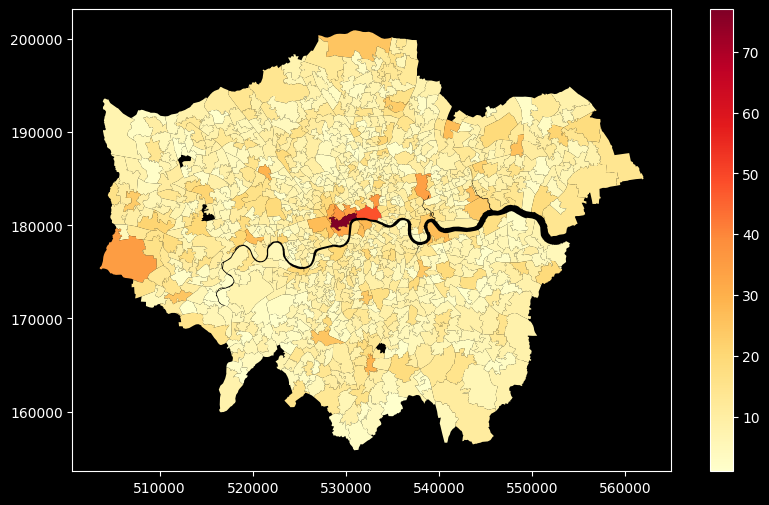

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax=plt.subplot(111)
modeling_res.plot(ax=ax, column='Accident_Number', legend=True, cmap='YlOrRd')

In [10]:
X_vars=['SBI','SLI','SVI','TFI','PSI','SI','GVI','SAI','x_coord','y_coord']
# X_vars_coord = [X_vars+['x_coord','y_coord']]
y_vars = ['Accident_Num']

In [11]:
X = modeling_res[X_vars]
X

SBI      SLI       SVI       TFI       PSI        SI       GVI  \
0    0.042500  0.00000  0.000833  0.043958  0.110000  0.041875  0.031875   
1    0.056667  0.00000  0.000000  0.040833  0.025000  0.328333  0.103333   
2    0.037692  0.00000  0.000000  0.044615  0.061154  0.252692  0.121538   
3    0.020000  0.00000  0.000000  0.100000  0.020000  0.185000  0.165000   
4    0.060000  0.00000  0.001667  0.035000  0.016667  0.300000  0.055000   
..        ...      ...       ...       ...       ...       ...       ...   
973  0.072105  0.00000  0.000000  0.030526  0.053158  0.245789  0.186316   
974  0.030000  0.00000  0.000000  0.025714  0.137143  0.125714  0.087143   
975  0.076296  0.00037  0.000741  0.037037  0.054815  0.235185  0.130741   
976  0.075882  0.00000  0.000000  0.022941  0.077647  0.152941  0.071765   
977  0.051538  0.00000  0.001538  0.033846  0.056923  0.196154  0.146154   

          SAI        x_coord        y_coord  
0    0.000208  532482.703937  181269.309933  
1    0.000000  548312.914543  189881.378500  
2    0.000000  548454.924883  188400.149798  
3    0.000000  551008.971700  186310.934347  
4    0.000000  548667.089281  186903.343524  
..        ...            ...            ...  
973  0.000000  540690.486531  175178.488684  
974  0.000000  537700.196477  177616.262807  
975  0.000000  539747.826321  179078.897542  
976  0.000000  539775.395179  178277.541155  
977  0.000000  538621.281201  177152.207124  

[978 rows x 10 columns]

In [12]:
y= modeling_res['Accident_Number']
y

0      48
1      12
2      26
3       2
4       6
       ..
973    19
974     7
975    27
976    17
977    13
Name: Accident_Number, Length: 978, dtype: int64

In [13]:
X.corr()

SBI       SLI       SVI       TFI       PSI        SI       GVI  \
SBI      1.000000 -0.011604  0.133062 -0.168160 -0.137608  0.024417 -0.015665   
SLI     -0.011604  1.000000  0.023485 -0.029176  0.059154 -0.062478 -0.017350   
SVI      0.133062  0.023485  1.000000 -0.002879  0.068466 -0.099994 -0.108798   
TFI     -0.168160 -0.029176 -0.002879  1.000000 -0.081609 -0.073063 -0.338852   
PSI     -0.137608  0.059154  0.068466 -0.081609  1.000000 -0.636461 -0.279159   
SI       0.024417 -0.062478 -0.099994 -0.073063 -0.636461  1.000000 -0.004579   
GVI     -0.015665 -0.017350 -0.108798 -0.338852 -0.279159 -0.004579  1.000000   
SAI      0.272085  0.027251  0.147893  0.027936  0.073223 -0.164879 -0.113017   
x_coord  0.065703 -0.002459 -0.013386 -0.066657 -0.038649  0.125937 -0.095107   
y_coord -0.003478  0.059284 -0.002595  0.116233  0.006350  0.091082 -0.208984   

              SAI   x_coord   y_coord  
SBI      0.272085  0.065703 -0.003478  
SLI      0.027251 -0.002459  0.059284  
SVI      0.147893 -0.013386 -0.002595  
TFI      0.027936 -0.066657  0.116233  
PSI      0.073223 -0.038649  0.006350  
SI      -0.164879  0.125937  0.091082  
GVI     -0.113017 -0.095107 -0.208984  
SAI      1.000000  0.001382  0.028769  
x_coord  0.001382  1.000000  0.028810  
y_coord  0.028769  0.028810  1.000000

### End of Part Ⅰ: X refers to independent vars, Y refers to dependent var

### Part Ⅱ: Distribution of Vars

In [30]:
import seaborn as sns
plt.style.use("seaborn")


def plot_index_distribution(df, column, xlabel):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)

    sns.kdeplot(data=df[column], shade=True, color='b', ax=ax)
    plt.xlabel(xlabel)
    plt.ylabel("probability")

    plt.title(f"Probability distribution of {xlabel} based on station")

    plt.show()



def plot_index_displot(df, column, xlabel):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)

    sns.displot(data=df[column], ax=ax)
    plt.xlabel(xlabel)
    plt.ylabel("probability")

    plt.title(f"Probability distribution of {xlabel} based on station")

    plt.show()


C:\Users\20191\AppData\Local\Temp\ipykernel_22656\1885072457.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


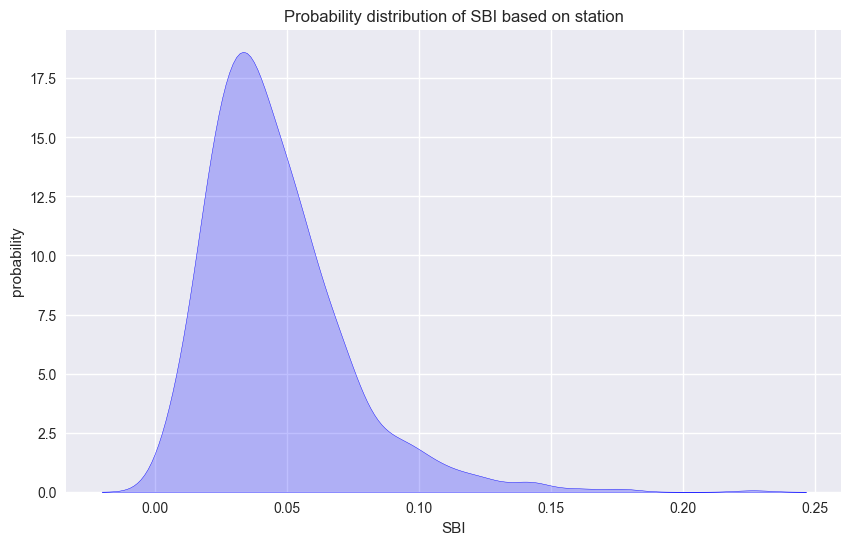

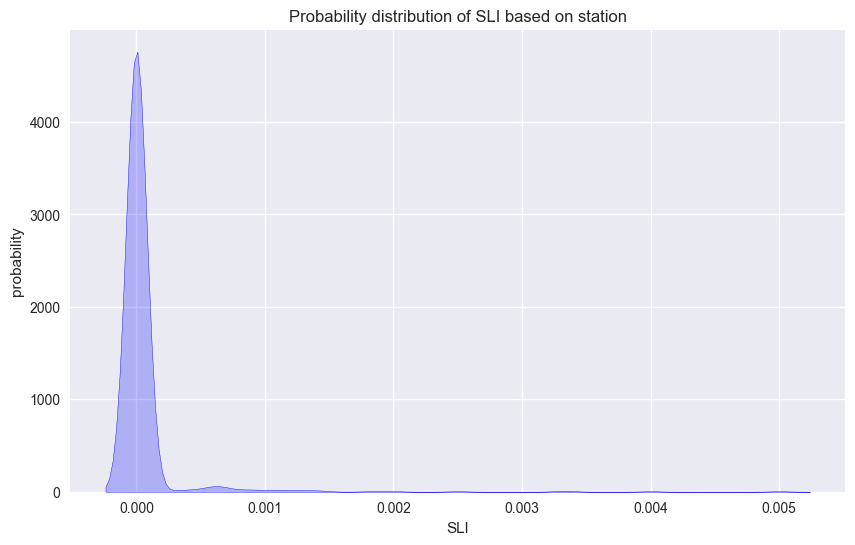

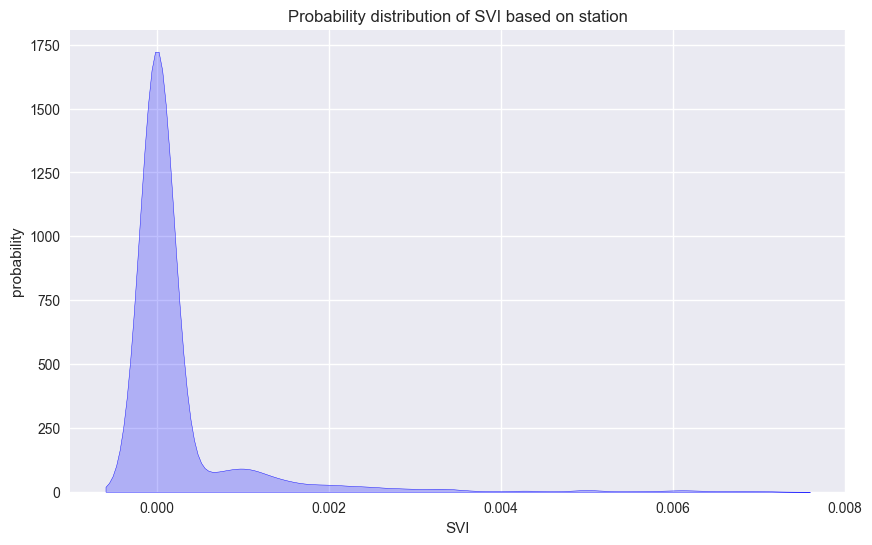

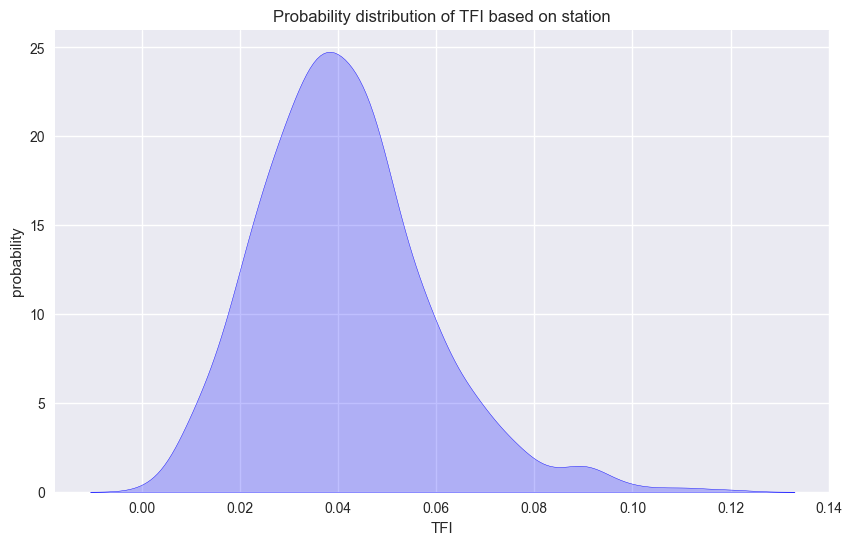

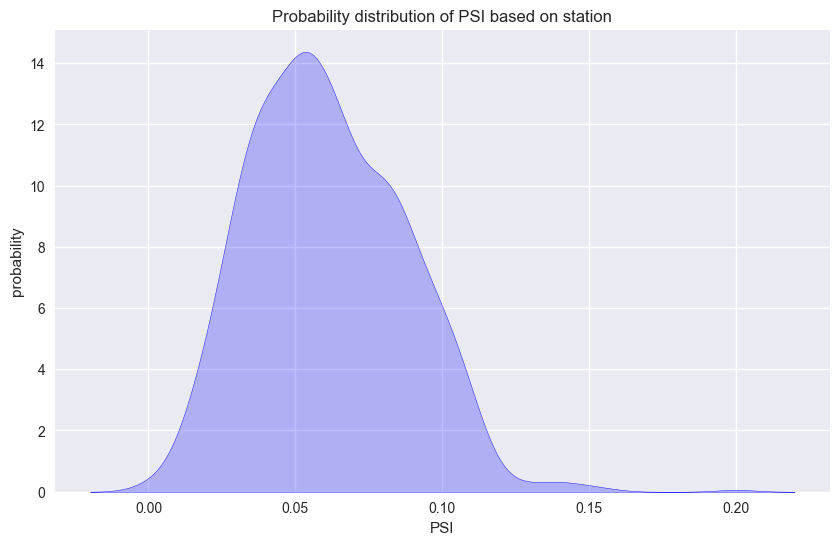

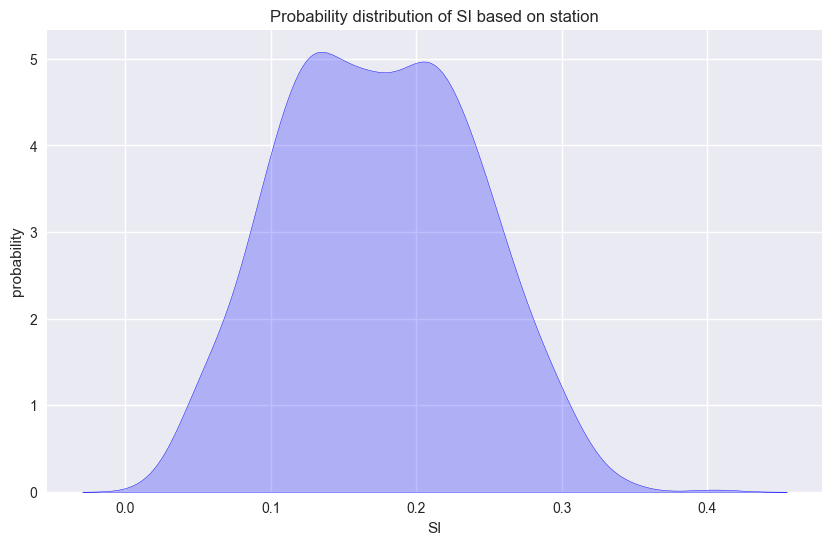

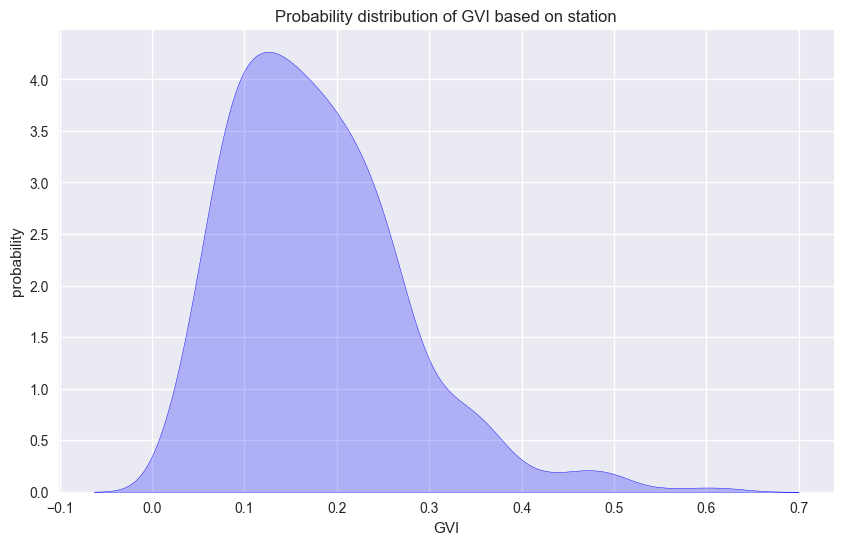

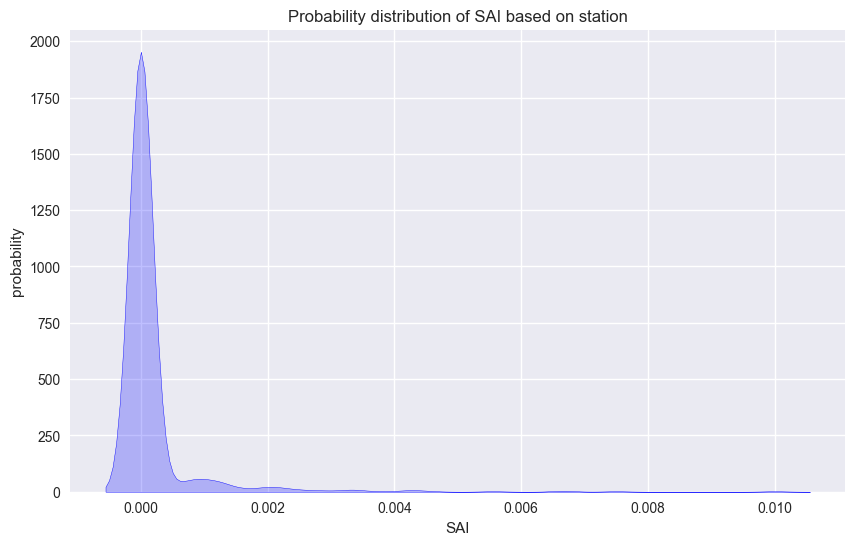

In [35]:
for index in X.columns.tolist()[:-2]:
    plot_index_distribution(X, index, index)

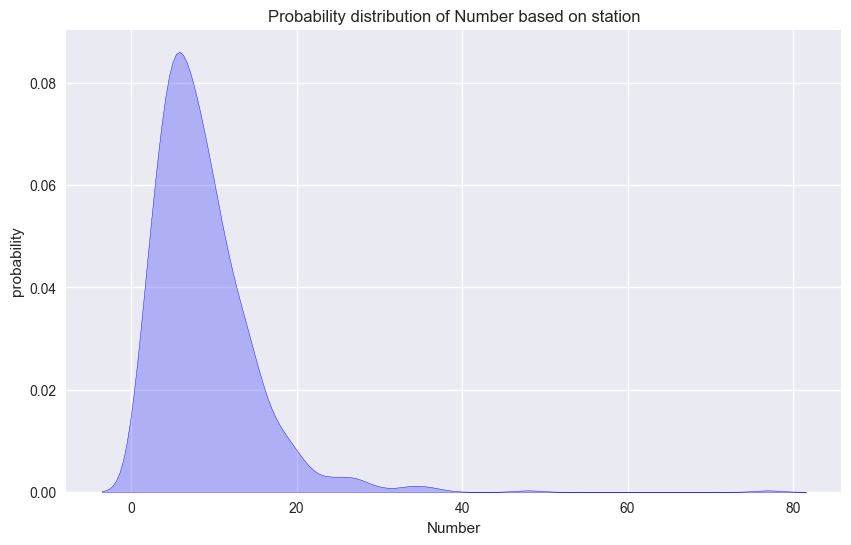

In [37]:
plot_index_distribution(modeling_res,'Accident_Number','Number')

### Part Ⅲ: Modelling using XGBoost and SHAP

In [38]:
import xgboost
import shap
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=222)

In [47]:
%%time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
import numpy as np
# Choose hyperparameter domain to search over
space = {
    'max_depth':
    hp.choice('max_depth', np.arange(1, 30, 1, dtype=int)),
    'colsample_bytree':
    hp.quniform('colsample_bytree', 0.3, 1.01, 0.05),
    'min_child_weight':
    hp.choice('min_child_weight', np.arange(1, 30, 1, dtype=int)),
    'subsample':
    hp.quniform('subsample', 0.3, 1.01, 0.05),
    'learning_rate':
    hp.choice('learning_rate', np.arange(0.05, 1.01, 0.05)),
    'gamma':
    hp.quniform('gamma', 0.1, 5, 0.05),
    'objective':
    'reg:squarederror',
    'eval_metric':
    'rmse',
}


def score(params, n_folds=5):

    #Cross-validation
    d_train = xgboost.DMatrix(X, y)

    cv_results = xgboost.cv(params,
                            d_train,
                            nfold=n_folds,
                            num_boost_round=500,
                            early_stopping_rounds=10,
                            metrics='rmse',
                            seed=0)

    loss = min(cv_results['test-rmse-mean'])

    return loss


def optimize(trials, space):

    best = fmin(score,
                space,
                algo=tpe.suggest,
                max_evals=2000,
                rstate=np.random.default_rng(333))  #Add seed to fmin function
    return best


trials = Trials()
best_params = optimize(trials, space)

# Return the best parameters
best_params = space_eval(space, best_params)

best_params

100%|██████████| 2000/2000 [25:40<00:00,  1.30trial/s, best loss: 4.826872688604231] 
Wall time: 25min 40s


{'colsample_bytree': 0.35000000000000003,
 'eval_metric': 'rmse',
 'gamma': 1.85,
 'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 8,
 'objective': 'reg:squarederror',
 'subsample': 1.0}

In [49]:
data_test = xgboost.DMatrix(X_test, y_test)

data = xgboost.DMatrix(X_train, y_train)
final_model = xgboost.train(best_params,
                            data,
                            num_boost_round=500,
                            verbose_eval=False,
                            evals=[(data_test, "Test")],
                            early_stopping_rounds=10)

data_all = xgboost.DMatrix(X)
y_pred = final_model.predict(data_all)
print(np.sqrt(mean_squared_error(y, y_pred)))
print(r2_score(y, y_pred))

3.5525828918776847
0.6585141585170169


In [51]:
explainer_shap = shap.TreeExplainer(final_model)
shap_values = explainer_shap(X)

[13:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [52]:
shap_interaction_values = shap.TreeExplainer(
    final_model).shap_interaction_values(X)

[13:35:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


['SBI', 'SLI', 'SVI', 'TFI', 'PSI', 'SI', 'GVI', 'SAI', 'x_coord', 'y_coord']

### Global contribution

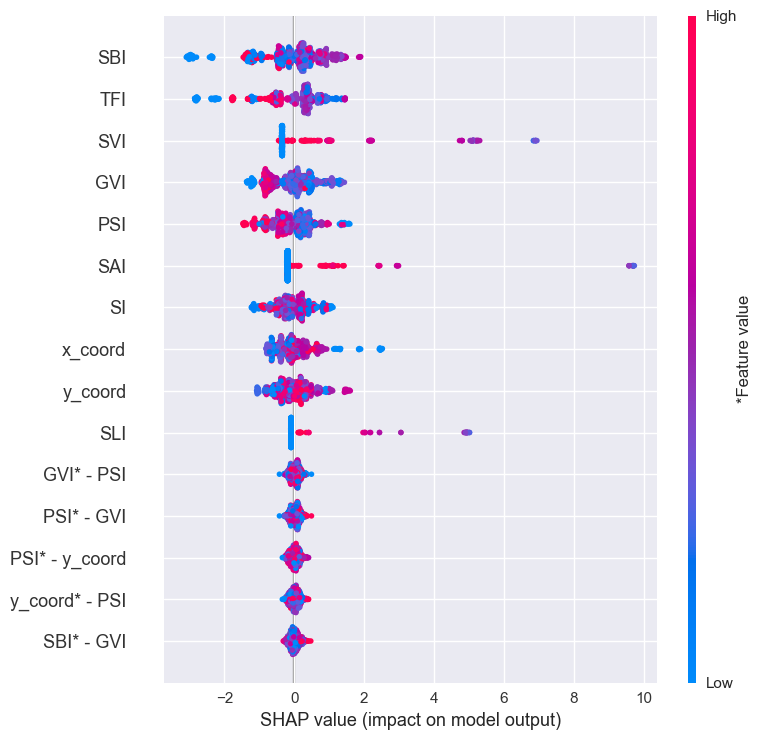

In [60]:
X_names = X.columns.tolist()

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

shap.summary_plot(shap_interaction_values,
                  X,
                  max_display=15,
                  feature_names=X_names,
                  plot_type="compact_dot")

In [63]:
from tqdm import tqdm

shap_bootstrap_list = []


def boostrap_shap(y_pred):
    n = y.shape[0]
    err = y - y_pred

    for i in tqdm(range(1000)):

        random_sample_index = np.random.choice(np.arange(n),
                                               size=n,
                                               replace=True)

        y_sample = y_pred + err[random_sample_index]

        sample_data = xgboost.DMatrix(X, y_sample)

        sample_model = xgboost.train(best_params,
                                     sample_data,
                                     num_boost_round=500,
                                     verbose_eval=False,
                                     evals=[(data_test, "Test")],
                                     early_stopping_rounds=10)

        explainer_shap = shap.Explainer(sample_model)
        shap_values = explainer_shap(X)

        shap_bootstrap_list.append(shap_values.values)

    return np.array(shap_bootstrap_list)

In [64]:
%%time
np.random.seed(333)

shap_bootstrap_list = boostrap_shap(y_pred)

  0%|          | 5/1000 [00:01<04:51,  3.41it/s][13:43:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[13:43:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  2%|▏         | 16/1000 [00:04<04:23,  3.74it/s][13:43:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGB

Wall time: 6min 42s


In [66]:
l_shap_global = np.abs(shap_bootstrap_list).mean(axis=1).mean(
    axis=0) - np.percentile(
        np.abs(shap_bootstrap_list).mean(axis=1), axis=0, q=2.5)

u_shap_global = np.percentile(
    np.abs(shap_bootstrap_list).mean(axis=1), axis=0,
    q=97.5) - np.abs(shap_bootstrap_list).mean(axis=1).mean(axis=0)

df_mean_shap = pd.DataFrame(np.vstack([
    np.array(X.columns),
    np.abs(shap_bootstrap_list).mean(axis=1).mean(axis=0), l_shap_global,
    u_shap_global,
    np.percentile(np.abs(shap_bootstrap_list).mean(axis=1), axis=0, q=2.5),
    np.percentile(np.abs(shap_bootstrap_list).mean(axis=1), axis=0, q=97.5)
]).T,
                            columns=[
                                'Feature', 'SHAP', 'SHAP_err_l', 'SHAP_err_u',
                                'SHAP_l', 'SHAP_u'
                            ])

In [67]:
df_mean_shap = df_mean_shap.sort_values(by="SHAP", ascending=True)

df_mean_shap["SHAP"] = df_mean_shap["SHAP"].astype("float")
df_mean_shap["SHAP_err_u"] = df_mean_shap["SHAP_err_u"].astype("float")
df_mean_shap["SHAP_err_l"] = df_mean_shap["SHAP_err_l"].astype("float")

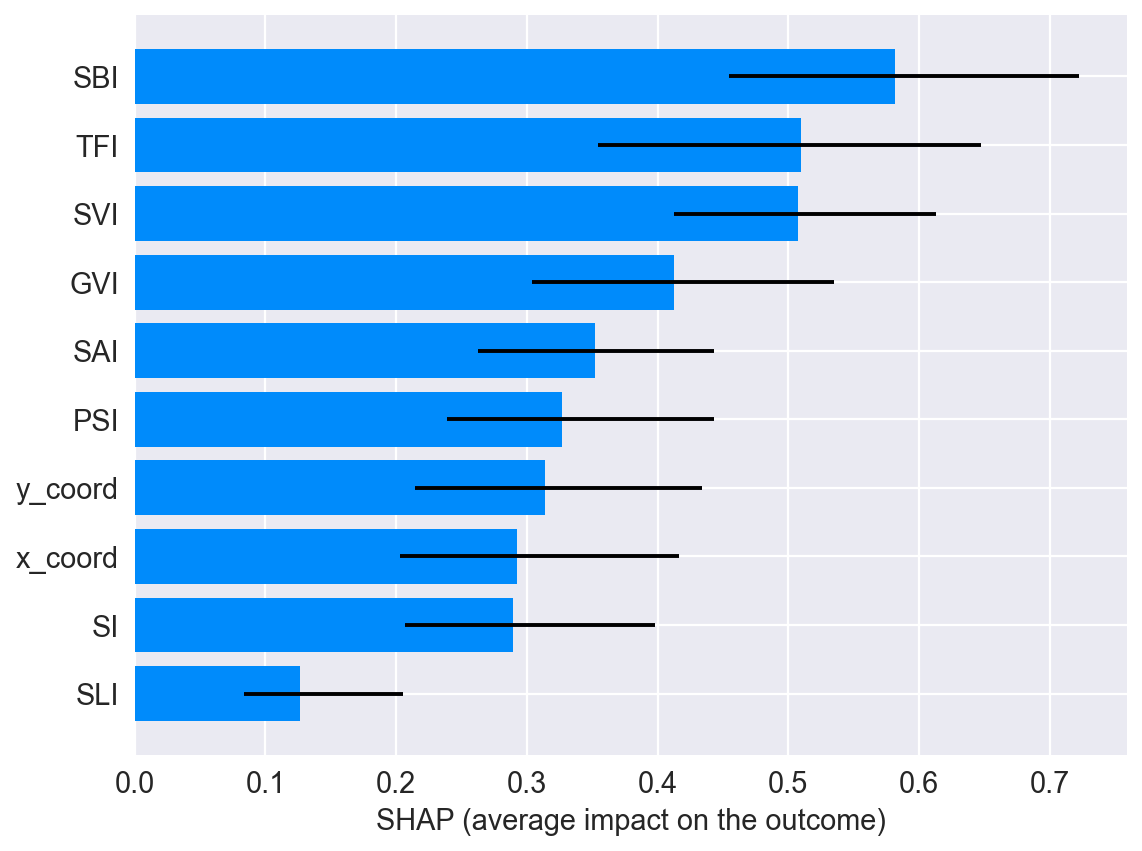

In [68]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6), dpi=160)

ax.barh(df_mean_shap.Feature,
        df_mean_shap.SHAP,
        xerr=df_mean_shap[['SHAP_err_l', 'SHAP_err_u']].values.T,
        color=shap.plots.colors.blue_rgb)

ax.set_xlabel('SHAP (average impact on the outcome)', fontsize=13)
ax.tick_params(labelsize=13)

In [69]:
#Compute the 95% confidence interval
l_95 = np.percentile(shap_bootstrap_list, axis=0, q=2.5)
u_95 = np.percentile(shap_bootstrap_list, axis=0, q=97.5)

In [71]:
import seaborn as sns


def plot(ax, term=0):

    order = np.argsort(X.values[:, term])

    ax.fill_between(X.values[:, term][order],
                    l_95[:, term][order],
                    u_95[:, term][order],
                    color='lightblue',
                    alpha=0.6)

    ax.scatter(X.values[:, term][order],
               shap_bootstrap_list.mean(axis=0)[:, term][order],
               s=10,
               color='black')

    ax.axhline(
        0,
        color='r',
        linestyle='--',
    )
    ax.set_xlabel(X_names[term], fontsize=13)
    #ax.set_ylim(-2.5,2.5)
    ax.set_ylabel("SHAP value", fontsize=13)
    plt.tight_layout()

### Partial contribution

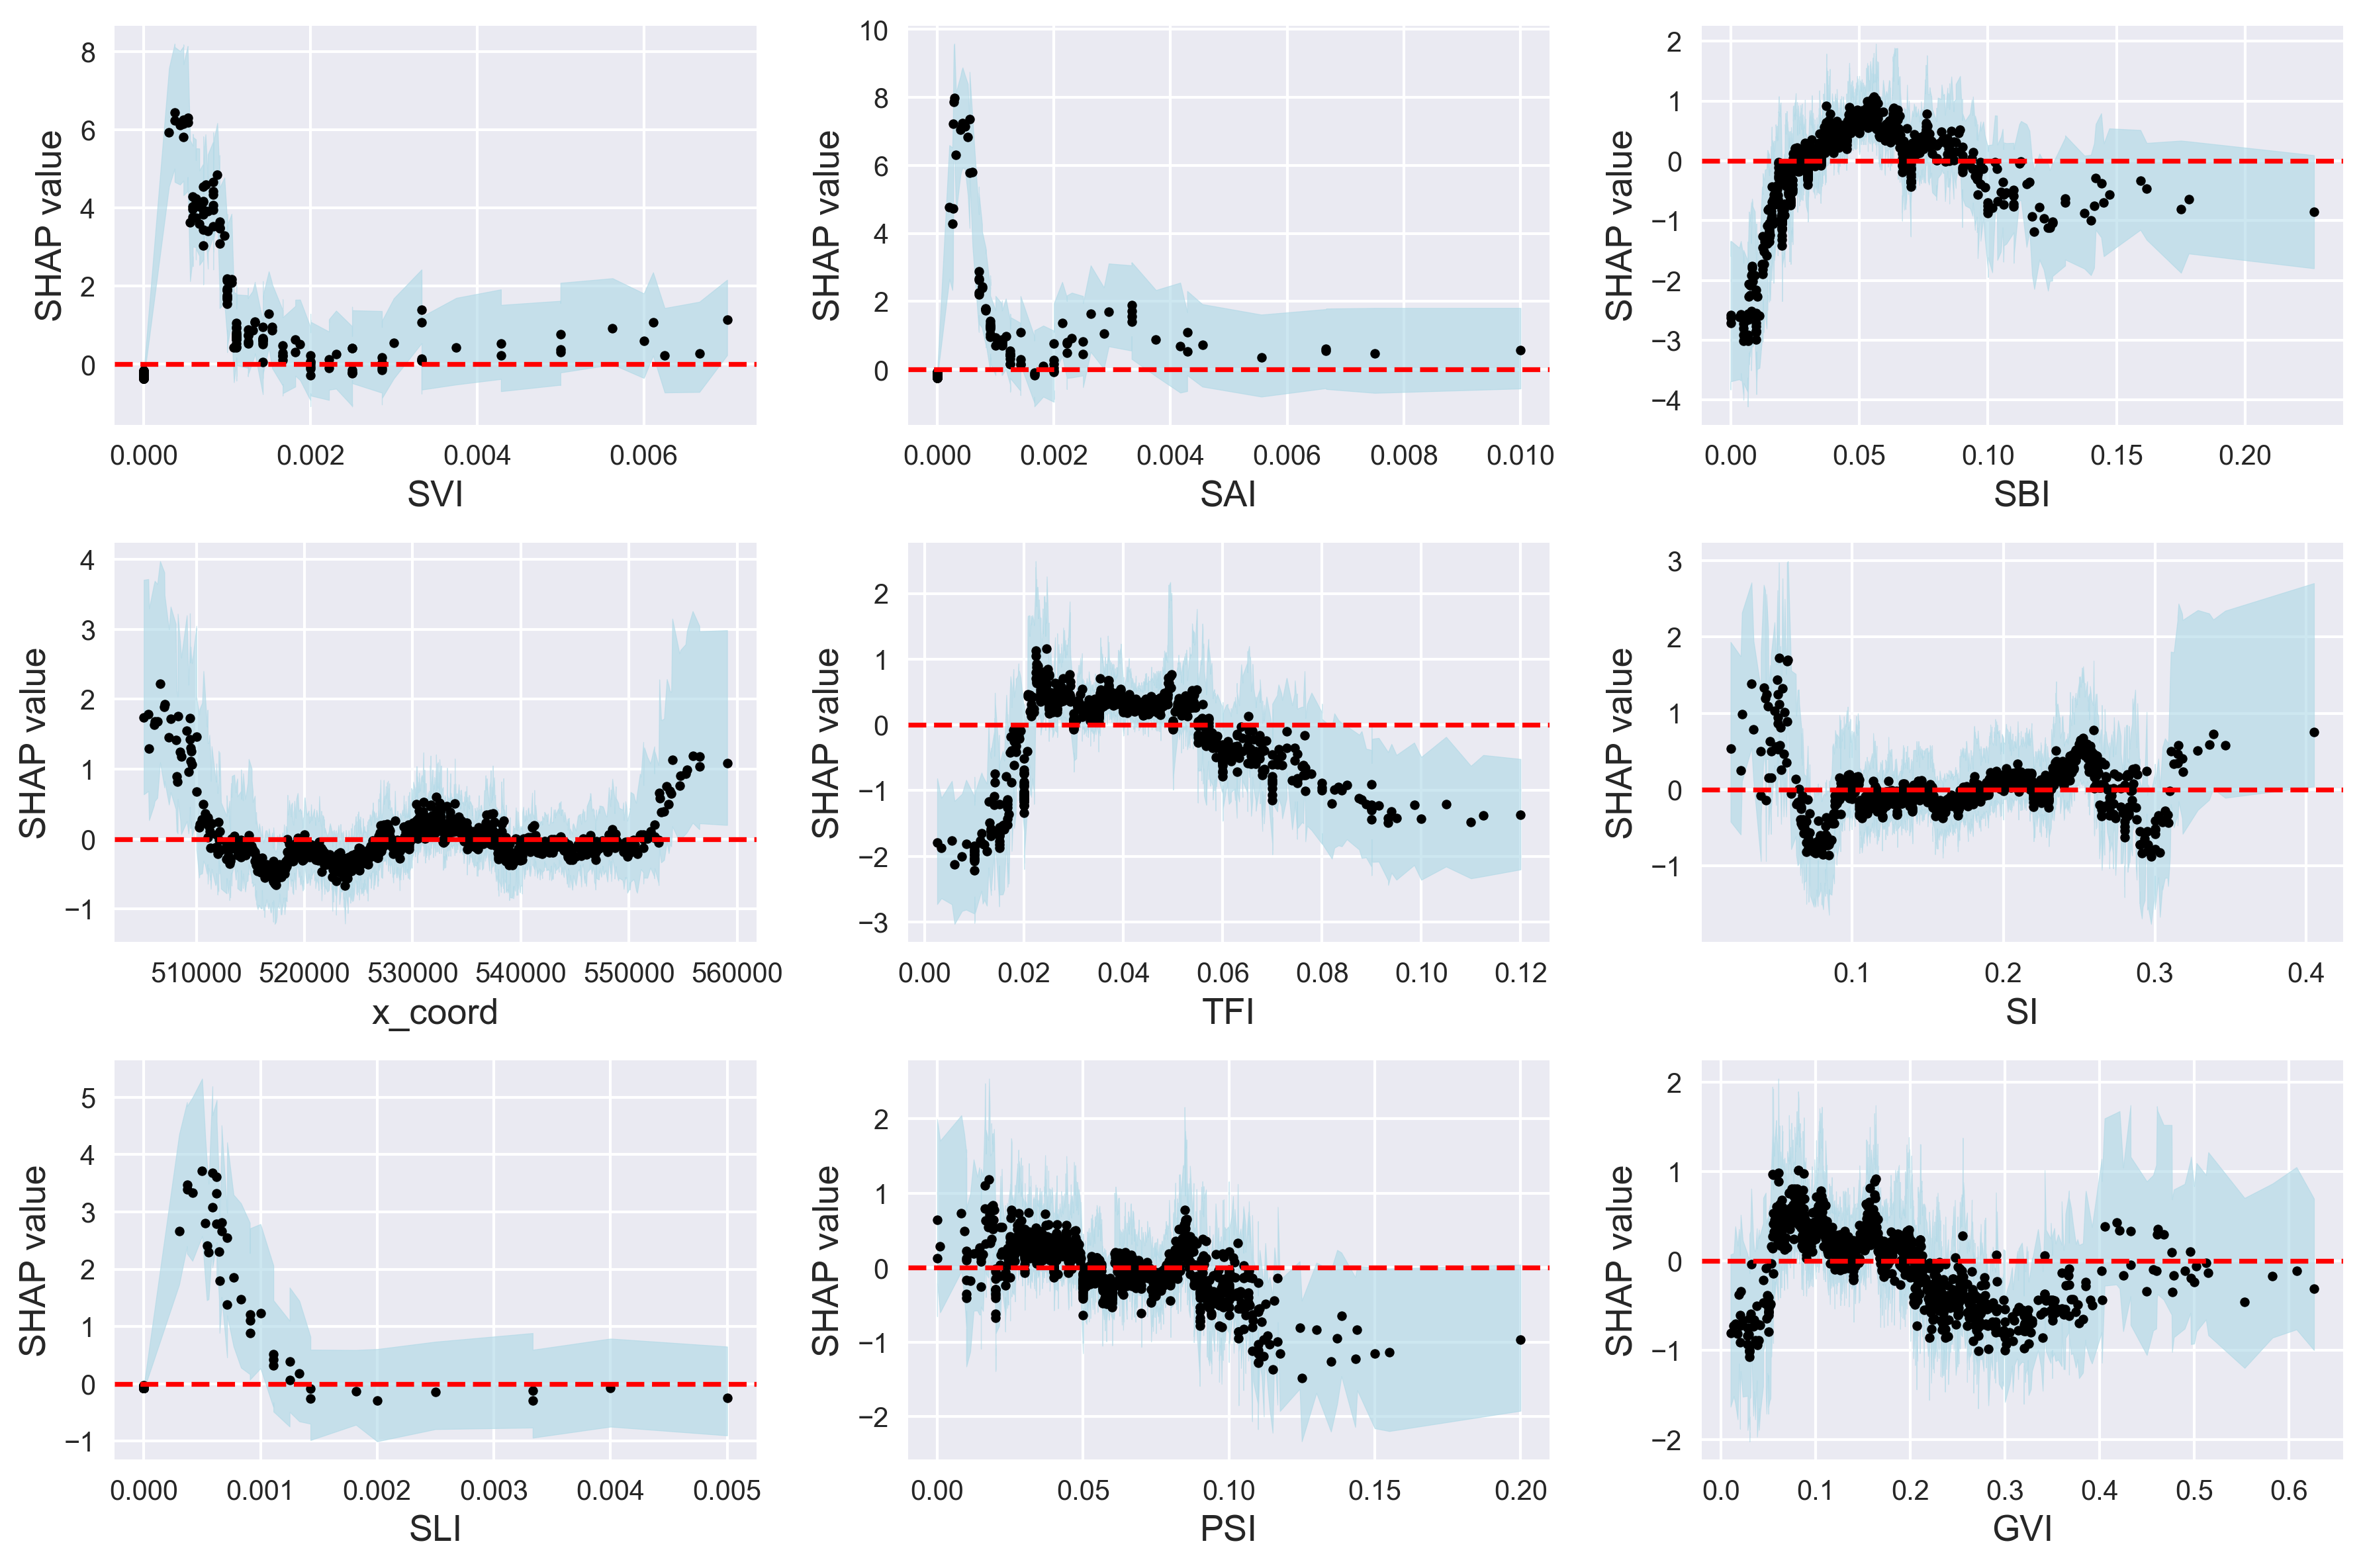

In [72]:
fig, ax = plt.subplots(3, 3, figsize=(12, 8), dpi=300)
ax = ax.ravel()
index = 0
for j in [2, 7, 0, 8, 3, 5, 1, 4, 6]:
    plot(ax=ax[index], term=j)
    index += 1


### contribution for each area

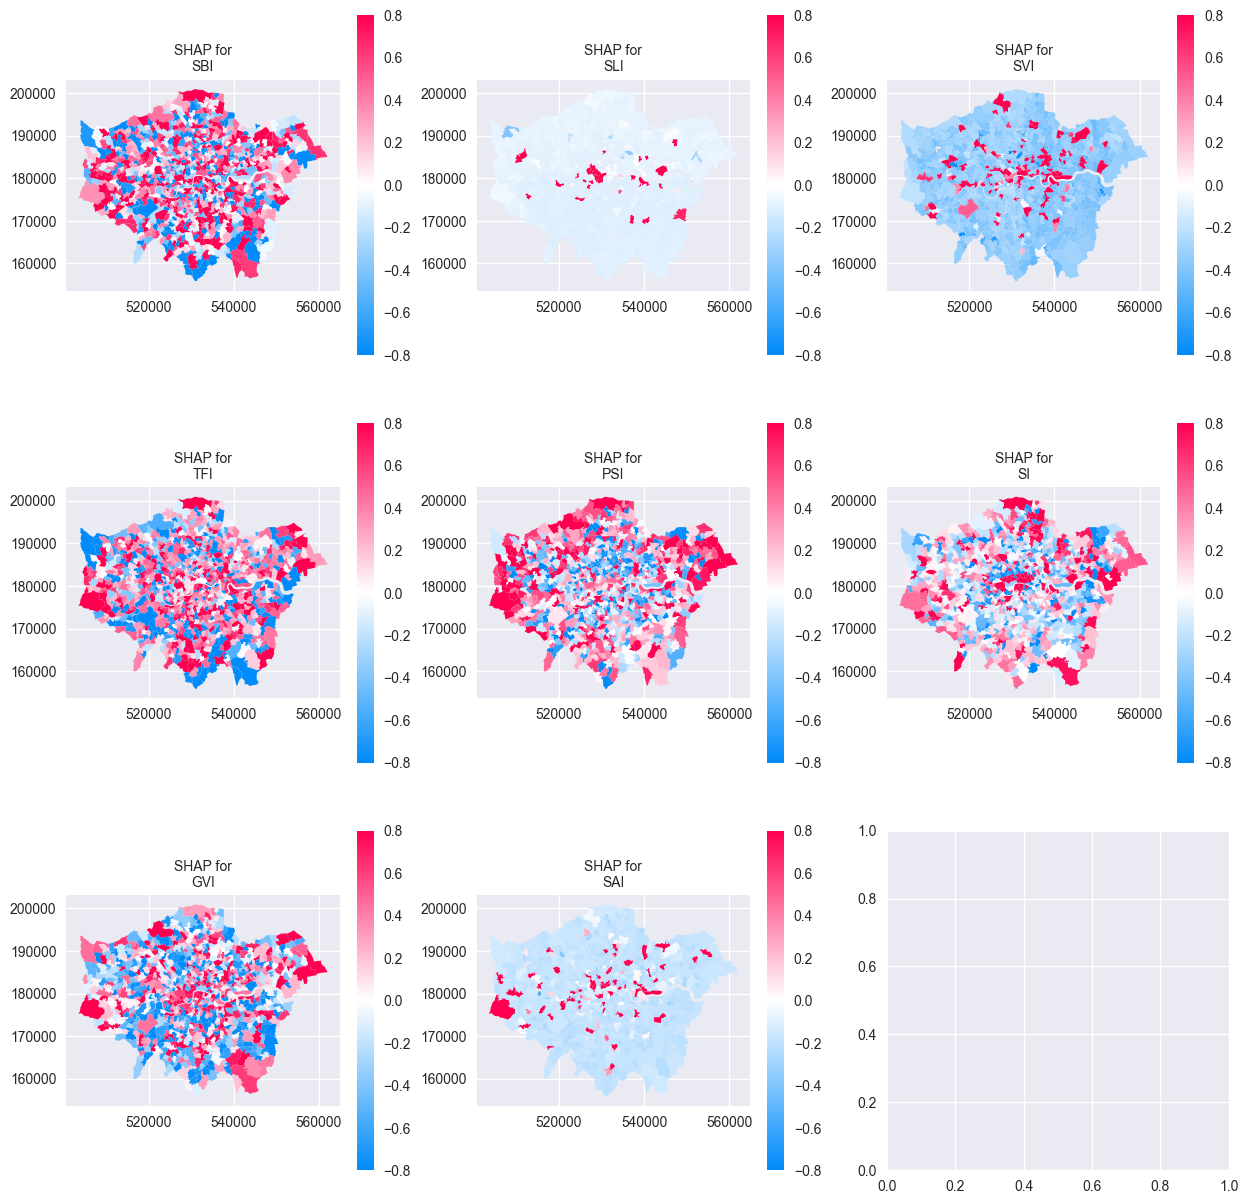

In [75]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for j in range(len(X_vars)-2):
    ax = ax.ravel()
    modeling_res.plot(ax=ax[j],
                 column=shap_values.values[:, j],
                 legend=True,
                 vmin=-0.8,
                 vmax=0.8,
                 cmap=shap.plots.colors.red_white_blue)

    ax[j].set_title("SHAP for\n" + X_vars[j], fontsize=10)

### location effect

(500655.0629697761, 564875.8129508395, 153596.65737396356, 203187.7494574752)

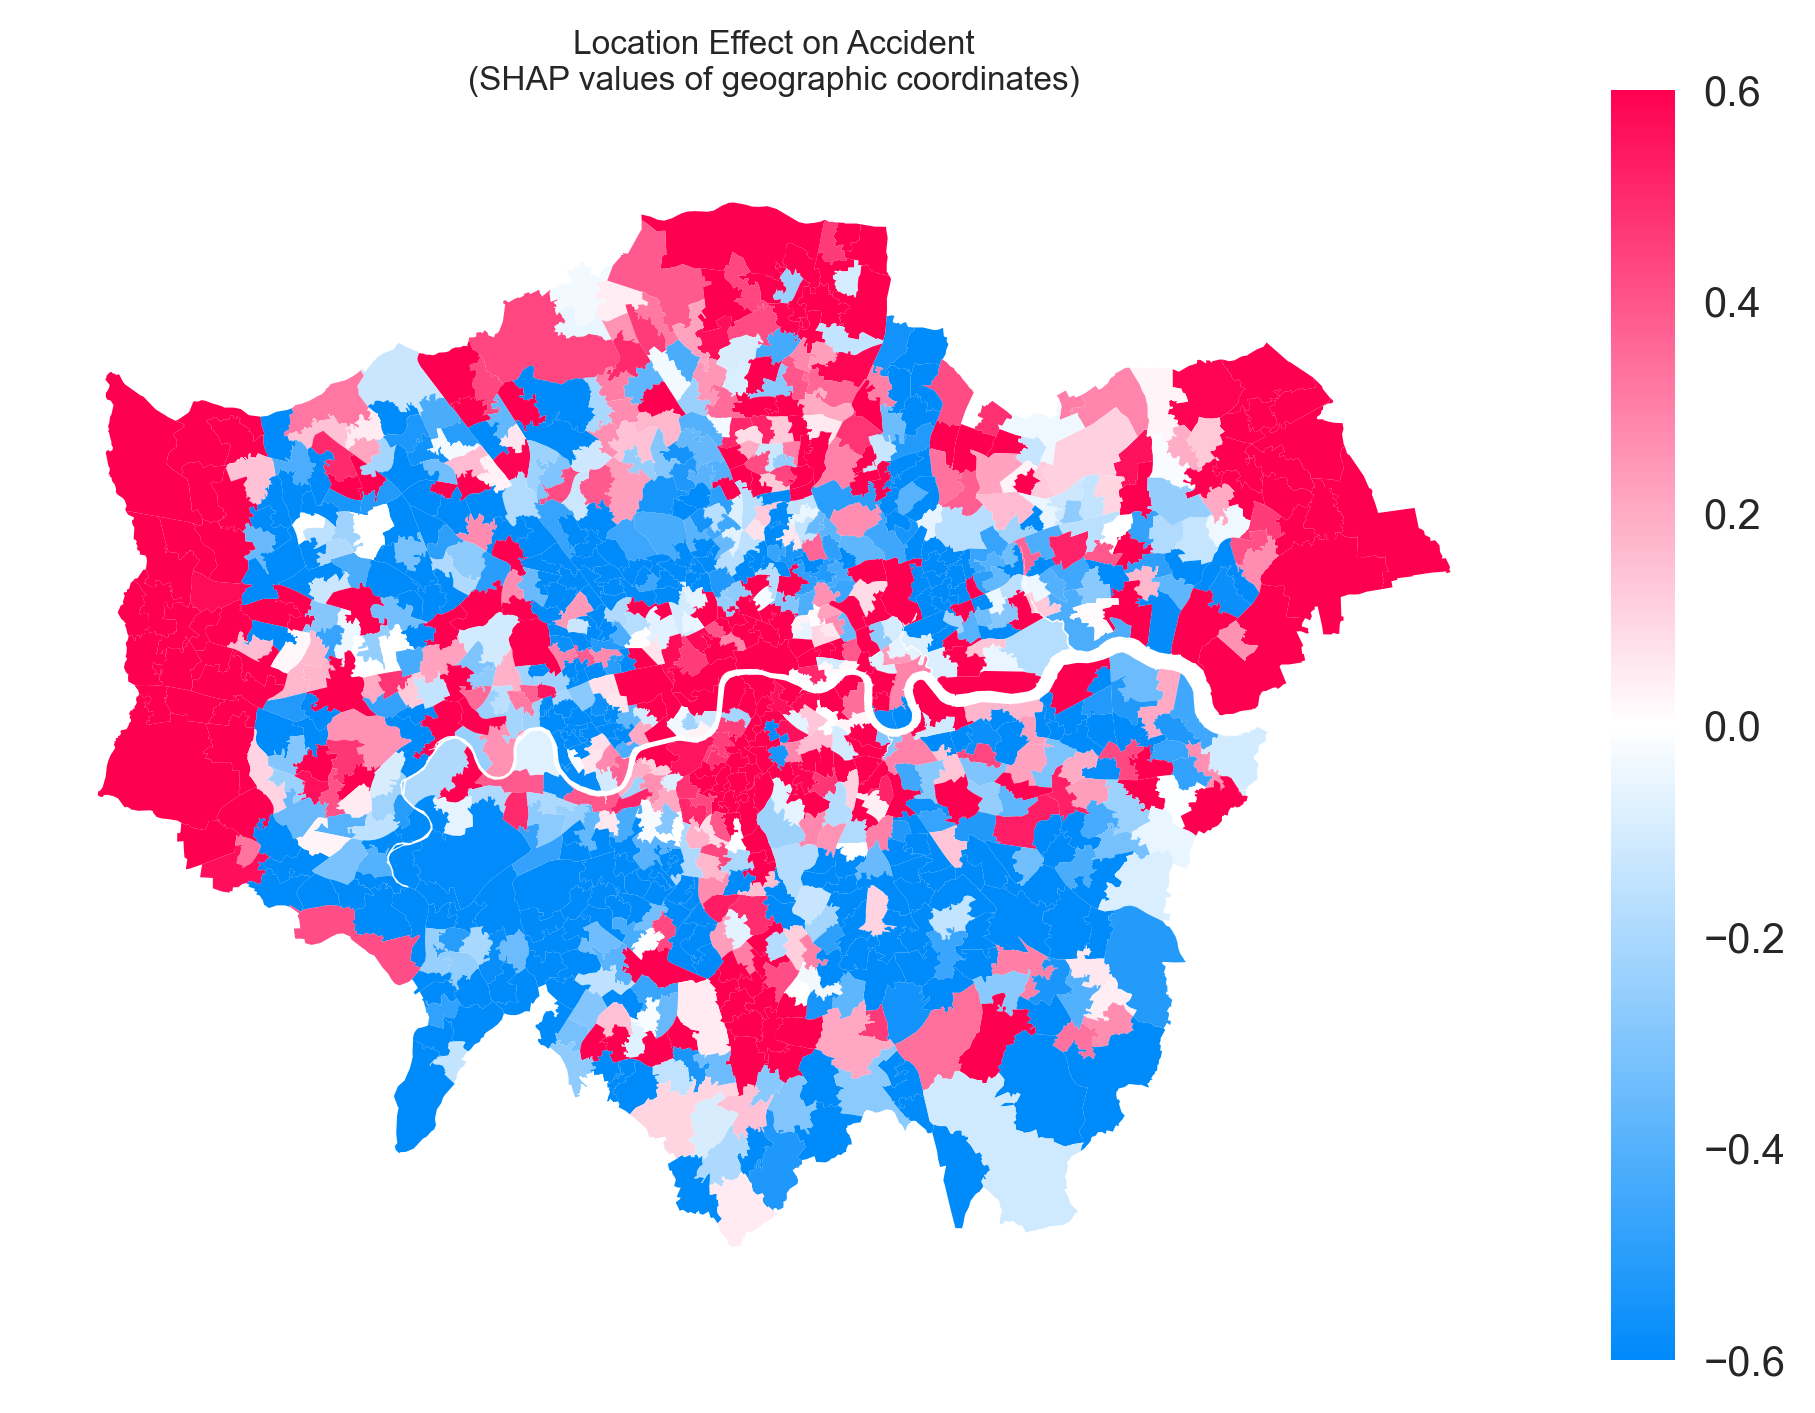

In [76]:
fig, ax = plt.subplots(dpi=300)

modeling_res.plot(ax=ax,
             column=shap_values.values[:, -1] + shap_values.values[:, -2],
             legend=True,
             vmin=-0.6,
             vmax=0.6,
             figsize=(15, 8),
             cmap=shap.plots.colors.red_white_blue)

plt.title(
    "Location Effect on Accident\n(SHAP values of geographic coordinates)\n",
    fontsize=8)

plt.axis('off')

### original distribution

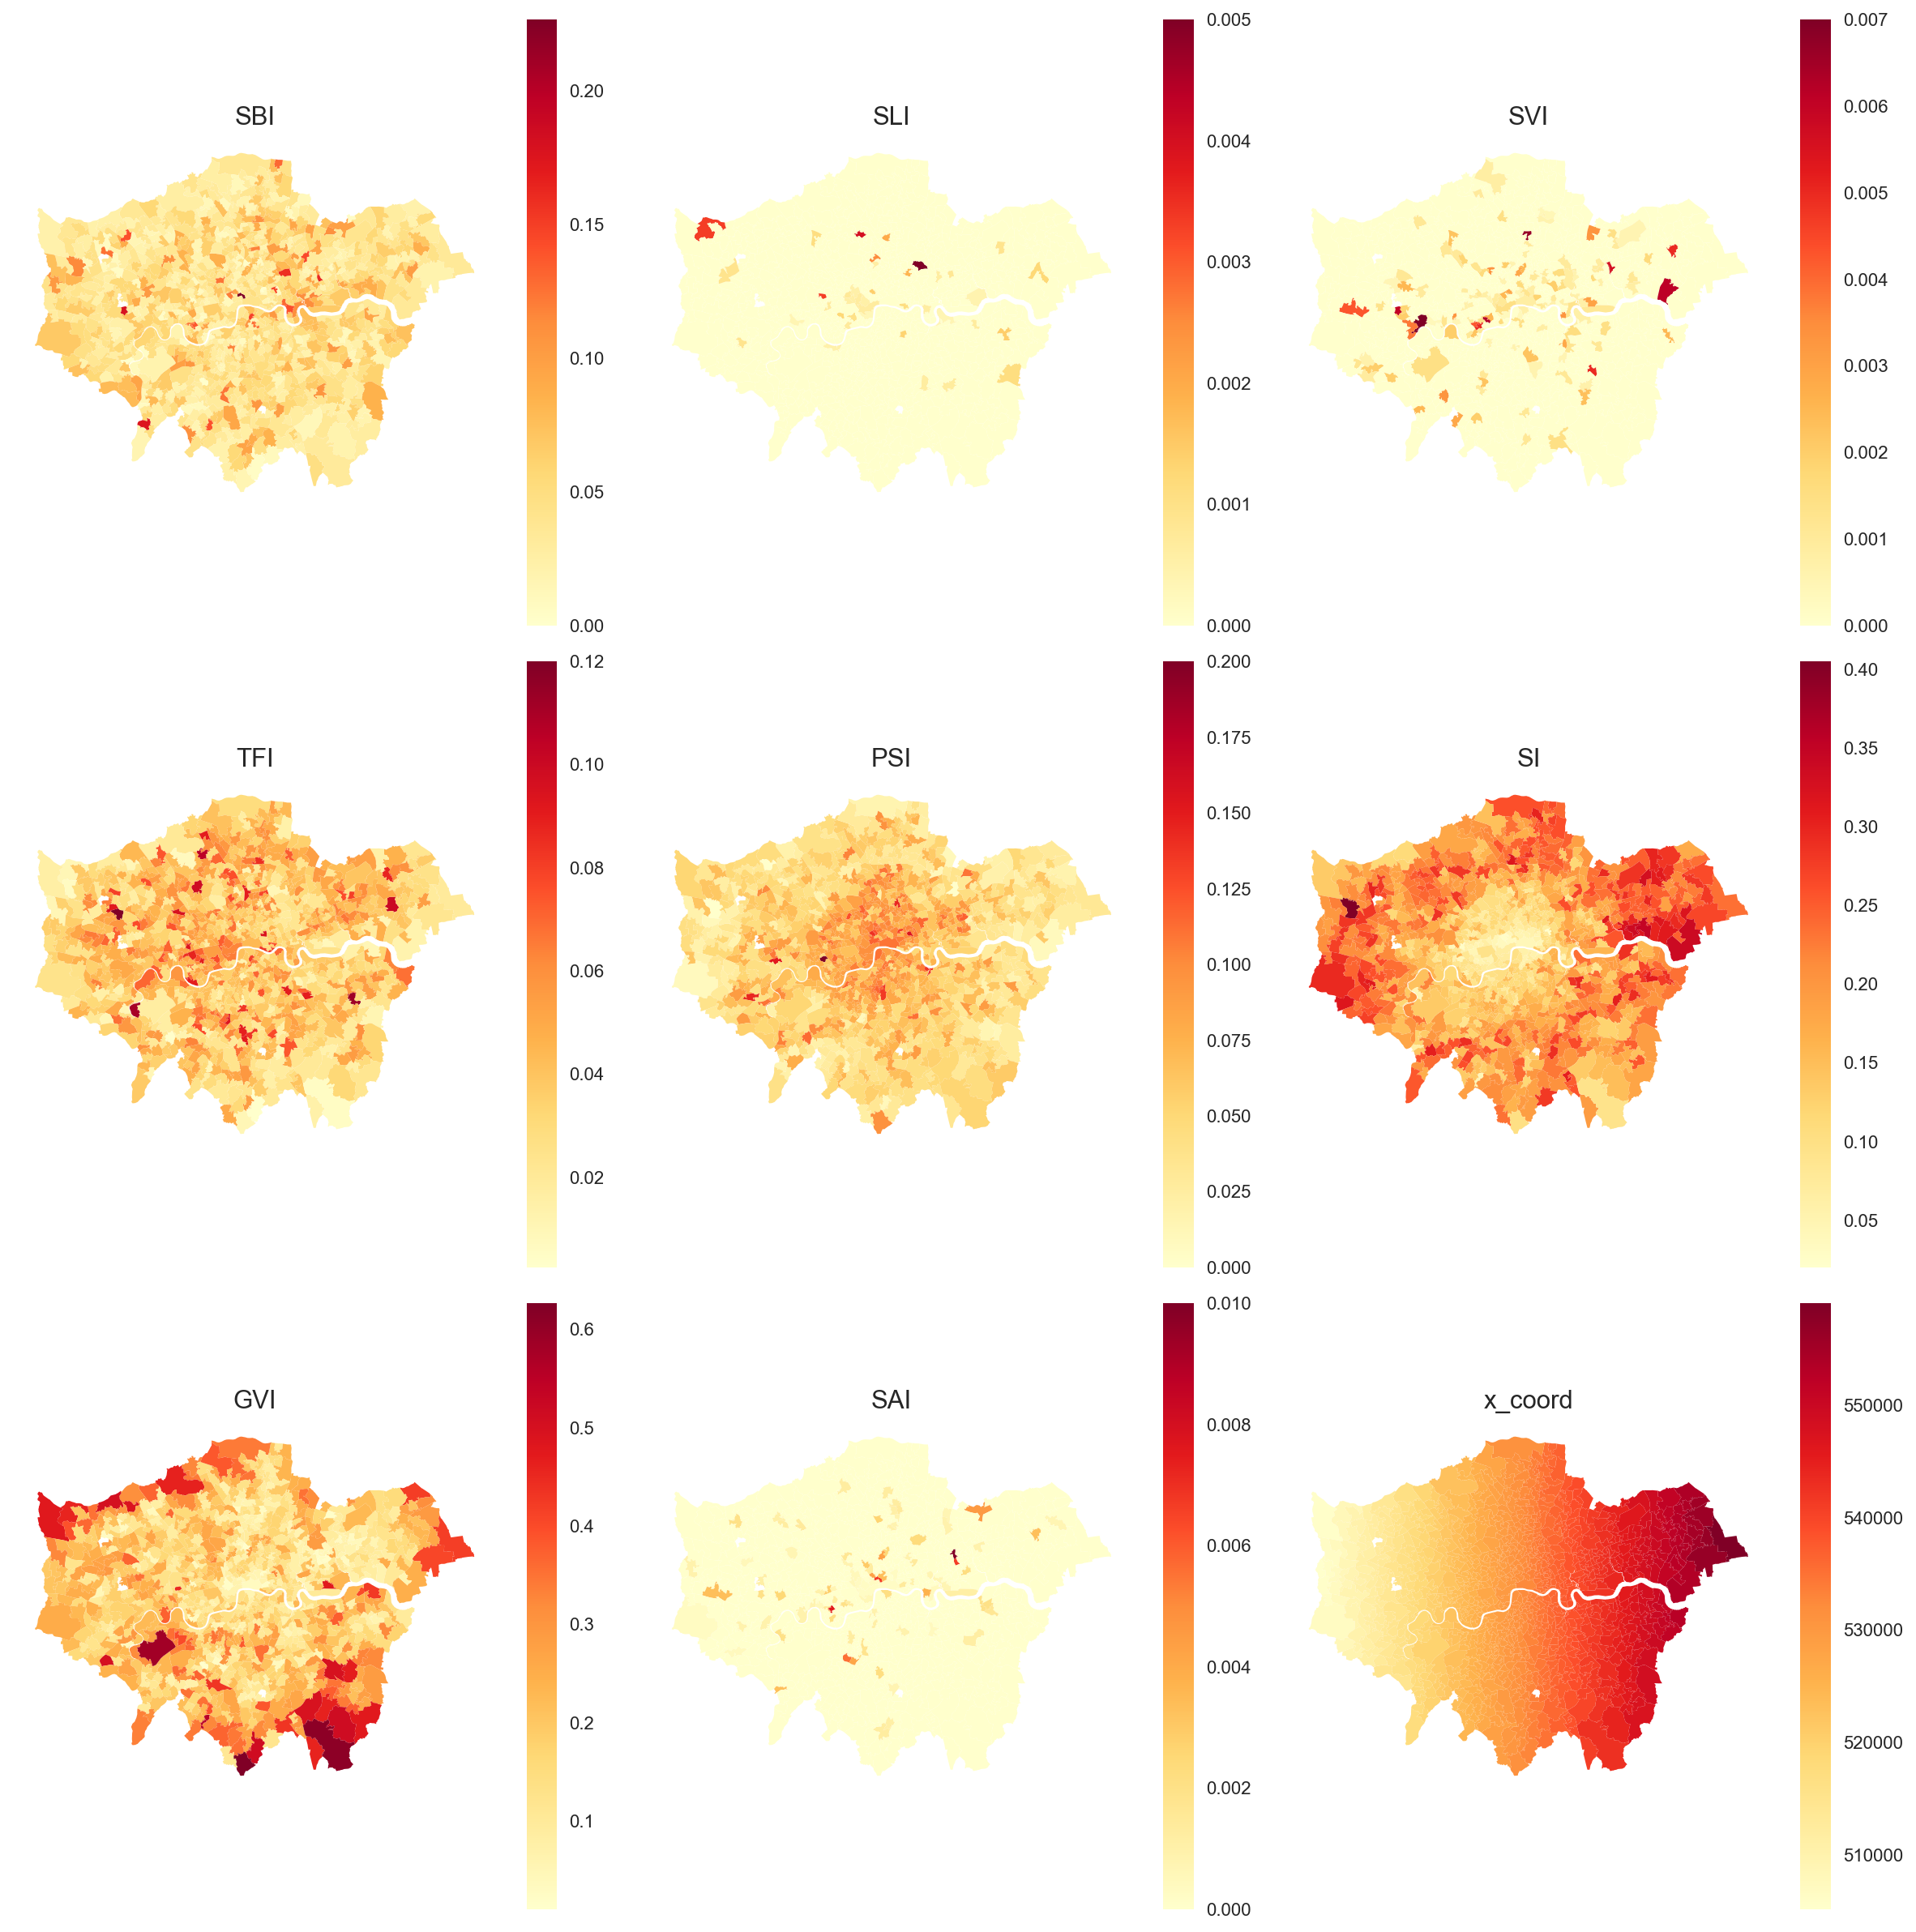

In [78]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15), dpi=160)

for j in [2, 7, 0, 8, 3, 5, 1, 4, 6]:
    ax = ax.ravel()

    modeling_res.plot(ax=ax[j],
                      column=shap_values.data[:, j],
                      legend=True,
                      cmap='YlOrRd')

    ax[j].set_title(X_names[j], fontsize=14)
    ax[j].axis('off')

fig.tight_layout()